# Warming Up!

In [1]:
bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


# Mengakses API covid19.go.id

In [6]:
import requests

resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


# Status Code

In [7]:
print(resp)

<Response [200]>


# Headers API

In [8]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Sun, 21 Nov 2021 05:33:56 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sun, 21 Nov 2021 05:31:40 GMT', 'ETag': 'W/"6199d9bc-3b7e9"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


# Mengekstrak Isi Respon

In [9]:
cov_id_raw = resp.json()

# Mengekstrak isi Respon - 2

In [12]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


# Analisa Data

In [22]:
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-11-20
Jumlah penambahan kasus sembuh : 379
Jumlah penambahan kasus meninggal : 14
Jumlah total kasus positif hingga saat ini : 4253098
Jumlah total kasus meninggal hingga saat ini : 143728


# Apa Kabar Jawa Barat?

In [23]:
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.covid19.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


# Memahami Kasus COVID-19 di Jawa Barat

In [27]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat : 707278
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.082208.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 97.762407.2%


# Memperoleh Informasi yang Lebih Lengkap

In [29]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       628 non-null    int64
 1   KASUS                         628 non-null    int64
 2   MENINGGAL                     628 non-null    int64
 3   SEMBUH                        628 non-null    int64
 4   DIRAWAT_OR_ISOLASI            628 non-null    int64
 5   AKUMULASI_KASUS               628 non-null    int64
 6   AKUMULASI_SEMBUH              628 non-null    int64
 7   AKUMULASI_MENINGGAL           628 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  628 non-null    int64
dtypes: int64(9)
memory usage: 44.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

# Menjinakkan Data

In [73]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


# Menunjukkan Melalui Gambar

In [74]:
import matplotlib.pyplot as plt

# Menunjukkan Melalui Gambar - 2

<Figure size 432x288 with 0 Axes>

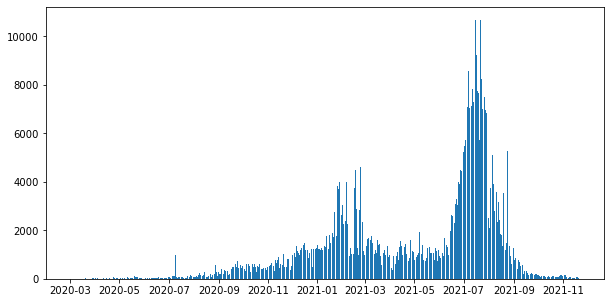

In [76]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

# Informasi pada Grafik

<ipython-input-78-60b32efac3b4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

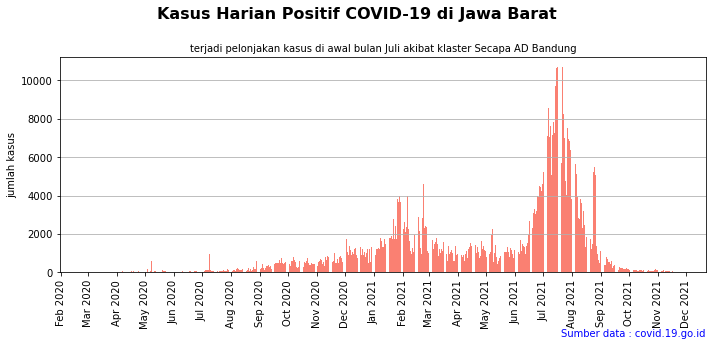

In [78]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('jumlah kasus')
ax.text(1, -0.3, 'Sumber data : covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Grafik untuk Kasus Sembuh

<ipython-input-79-b5e68d1093c2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

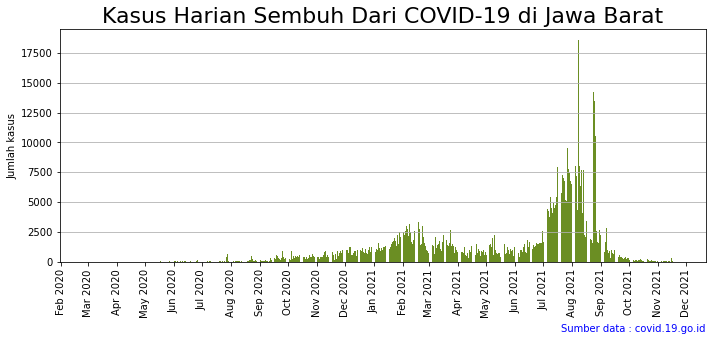

In [79]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data : covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Grafik untuk Kasus Meninggal

<ipython-input-80-709e51f58ebf>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

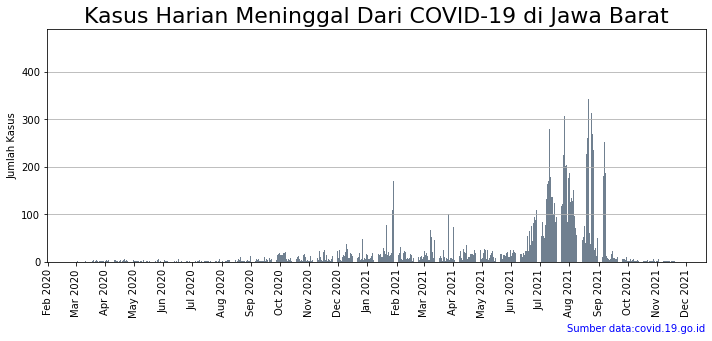

In [80]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data:covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Apakah Pekan ini Lebih Baik?

In [84]:
cov_jabar_pekanan = (cov_jabar_tidy .set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     90 non-null     int64
 1   pekan_ke  90 non-null     int64
 2   jumlah    90 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


# Menjawab Pertanyaan

In [85]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


<ipython-input-85-7634d535c914>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


# Membuat Bar Chart

<Figure size 432x288 with 0 Axes>

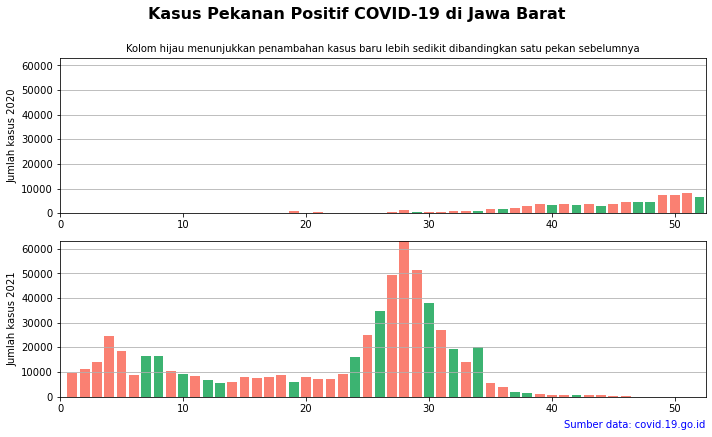

In [87]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						figsize=(10, 3*jml_tahun_terjadi_covid19))
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun'] == tahun_terjadi_covid19[i]],
		  x = 'pekan_ke', height='jumlah',
		  color=['mediumseagreen' if x is True else 'salmon'
			for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
			ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=10)
	elif i == jml_tahun_terjadi_covid19 - 1:
				 ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)
				 
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_xlabel('')
	ax.set_ylabel('Jumlah kasus %d' %(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')
	
plt.tight_layout()
plt.show()

# Pola dan Dinamika

In [89]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
623 2021-11-16             1146            691084                14721
624 2021-11-17             1235            691153                14723
625 2021-11-18             1228            691214                14725
626 2021-11-19             1089            691419                14727
627 2021-11-20             1113            691438                14727


# Membuat Line Chart

<ipython-input-90-99f2ff29e7af>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

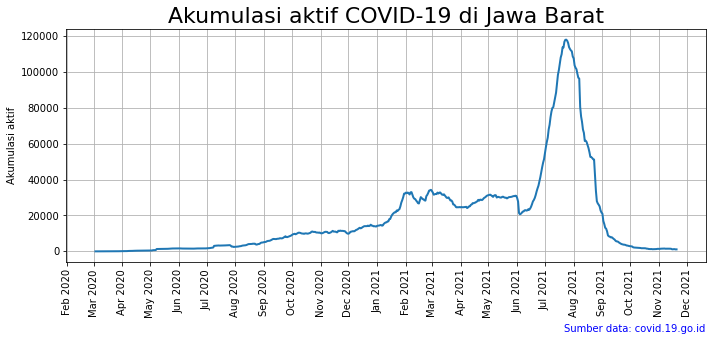

In [90]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

# Tahap Terakhir

<Figure size 432x288 with 0 Axes>

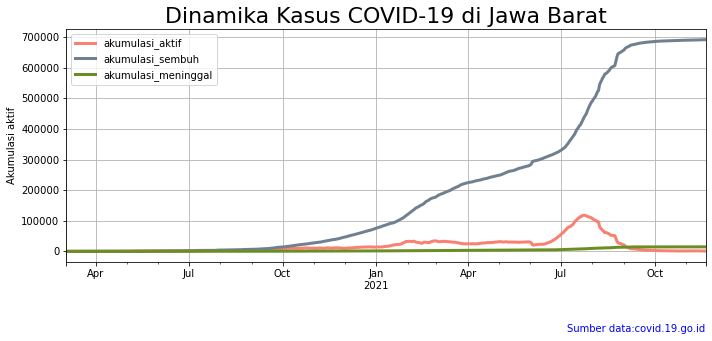

In [94]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						   color=['salmon','slategrey','olivedrab'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data:covid.19.go.id', color='blue', ha='right',
	   transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()